In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import FlowCal as FC
import seaborn as sns
import os

# variants from a common file
import function_fcs as fc
from importlib import reload
reload(fc)

from matplotlib import colormaps
from scipy.stats import ttest_ind, t, skew

random_seed = 12  # Choose any integer value
np.random.seed(random_seed)

file_dir=os.getcwd()+'/'

0.02


([<matplotlib.axis.XTick at 0x143356950>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

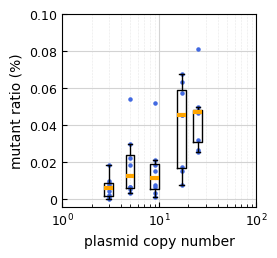

In [11]:
folder_='EvolvR/'
pcn_=[3,5,9,17,25]

files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

#============================
p_value= fc.alpha_
print(p_value)

files_evolvR=files_
dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_evolvR[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)
#====================================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,80])
#plt.ylim(-0.0015,0.055)
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])


0.02


([<matplotlib.axis.XTick at 0x14370b250>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

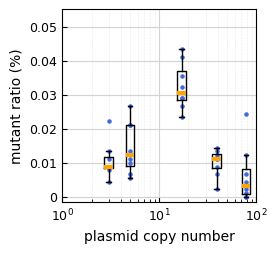

In [13]:
reload(fc)  #IFFL_gain

folder_='IFFL_gain/'
pcn_=[3,5,17,39,79]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

#============================
p_value= fc.alpha_
print(p_value)

files_gain=files_
dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_gain[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)
#====================================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,80])
plt.ylim(-0.0015,0.055)
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])


0.02


([<matplotlib.axis.XTick at 0x143254710>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

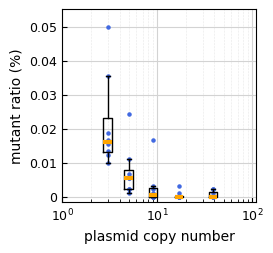

In [14]:
reload(fc) # IFFL_loss

folder_='IFFL_loss/'
pcn_=[3,5,9,17,39]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_loss=files_
#============================
p_value= fc.alpha_
print(p_value)
dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_loss[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)

#====================================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(-0.0015,0.055)
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

0.02


([<matplotlib.axis.XTick at 0x140d0df50>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

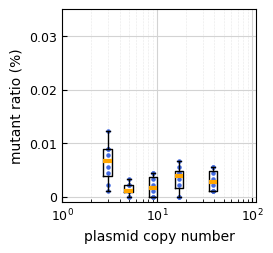

In [15]:
folder_='regulator_lacI/'
pcn_=[3,5,9,17,39]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_regulatorlacI=files_
#============================
p_value= fc.alpha_
print(p_value)
dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_regulatorlacI[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)

#===========================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#--------------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(-0.001,0.035);
plt.yticks([0,0.01, 0.02,0.03],['0','0.01','0.02','0.03'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])

0.02


([<matplotlib.axis.XTick at 0x14057b6d0>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

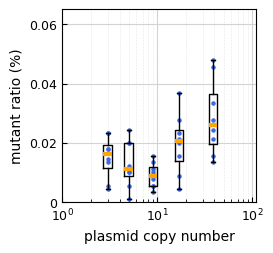

In [16]:
folder_='regulator_lacO/'
pcn_=[3,5,9,17,39]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_

files_regulatorlacO=files_

#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_regulatorlacO[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)
#====================================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
#plt.ylim(0, None)
plt.ylim(0, 0.065)
plt.yticks([0,0.02,0.04,0.06],['0','0.02','0.04','0.06'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])


0.02


([<matplotlib.axis.XTick at 0x141883810>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

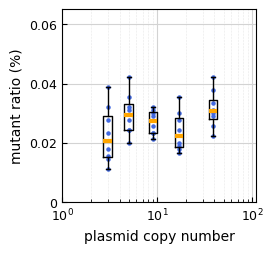

In [17]:
folder_='feedback_lacI/'
pcn_=[3,5,9,17,39]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_feedbacklacI=files_
#============================
p_value= fc.alpha_
print(p_value)

dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_feedbacklacI[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)

#====================================
labellist=pcn_

fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
plt.ylim(0, 0.065)
plt.yticks([0,0.02,0.04,0.06],['0','0.02','0.04','0.06'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])


0.02


([<matplotlib.axis.XTick at 0x144aaab90>,
 [Text(1, 0, '$10^0$'), Text(10, 0, '$10^1$'), Text(100, 0, '$10^2$')])

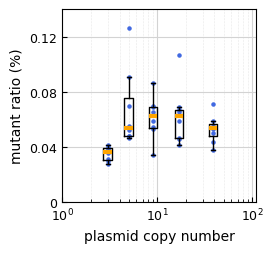

In [18]:
folder_='feedback_lacO/'
pcn_=[3,5,9,17,39]


files_=dict()
for k in range(0,len(pcn_)):
    flist_=[]
    fname=[]
    for i in range(0,8):
        tmp=file_dir+folder_+folder_[:-1]+'_PCN'+str(pcn_[k])+'_trial'+str(i)+'.fcs'
        fname.append(tmp)

    flist_=fc.fcs_dataframe_(fname,print_=False)
    files_[str(pcn_[k])]=flist_


files_feedbacklacO=files_

#=========================
p_value= fc.alpha_
print(p_value)
dataset_boxplot=[]
for k in range(0,len(pcn_)):
    PCN_=str(pcn_[k])
    dataset=files_feedbacklacO[PCN_]['fcs']

    arr_=[]
    for data in dataset:
        mut_indx=fc.variants_(data, data, p_value)
        mut_=data[mut_indx]
        arr_.append(len(mut_)/len(data)*100)
        
    dataset_boxplot.append(arr_)
#====================================
labellist=pcn_
fig=plt.figure(figsize=(2.5,2.5))
#---------------------
ax1_= plt.subplot(111)
plt.grid(which='major', color='lightgray'); plt.grid(which='minor', linestyle=':', linewidth='0.4', color='lightgray')
fc.fig_boxplot_N(dataset_boxplot,labellist,title='',ax=ax1_)
plt.xlim([1,110])
#plt.ylim(0, 0.065)
plt.yticks([0,0.04,0.08,0.12],['0','0.04','0.08','0.12'])
plt.xticks([1,10,100],['$10^0$', '$10^1$','$10^2$'])


In [ ]:
\